In [58]:
import pandas as pd
import soundfile as sf
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import butter, lfilter, freqz,firwin,kaiserord,filtfilt,decimate

# Pandas is a manipulation tool that allows to sstore and manipulate tabular data. i used it to get wave files from the csv.¶

In [25]:
##### reading the sound files from the down_loaded_freesound_files3.csv


sfile = pd.read_csv('down_loaded_freesound_files3.csv') 

#calling the sound files directly from the newfilename column
S_one = (sfile.newfilename[17])

print(S_one)

119860.wav


WAV file:  Fs = 44100, x.shape = (543782,), x.dtype = float64


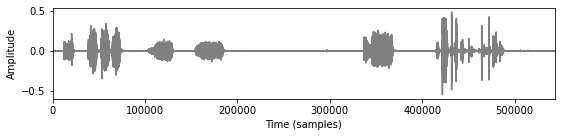

In [26]:
def print_plot_play(x, Fs, text=''):
# Prints information about an audio singal, plots the waveform, Creates player 
        # x: Input signal
       # # Fs: Sampling rate of x    
        #text: Text to print
        
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()



#Load the audio files ans ample rates
data, sample = sf.read(S_one)

#plotting waveforms
print_plot_play(x=data, Fs=sample, text='WAV file: ' )


# Create  FIR filter

#  The fir filter is designed using window method. The function computes the coefficients of a finite impulse response filter

# filter implementation using scipy

In [27]:
cut_off = 14700
Nyq = sample / 2

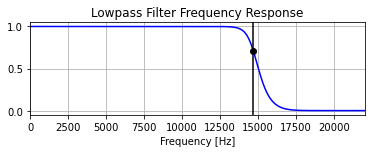

In [28]:
#https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
def butter_lowpass(cutoff, sample, order=10):
    nyq = 0.5 * sample
    norm_cutoff = cutoff / Nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return b, a

# Filter requirements.
order = 10       # sample rate, Hz
cutoff = 14700  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, sample, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(Nyq*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, Nyq)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.subplots_adjust(hspace=0.35)
plt.show()

# defining a low pass fir filter with scipy, the window length, cutoff frequency and windown is need. The hamming window is used in this case. The hammin window is defined as: w(n) = α − βcos*2πn/N - 1.                                                 #The window lenght should be equal to the transform lenght.
# using the firwin to create lowpass filter coefficient
#  parameters used:
# taps : length of the filter; must be off is a passband includes the nyquist frequency
# cutoff 
# np.linspace(start,stop,num,endpoint),to create an evenly spaced sequence in a specified interval.

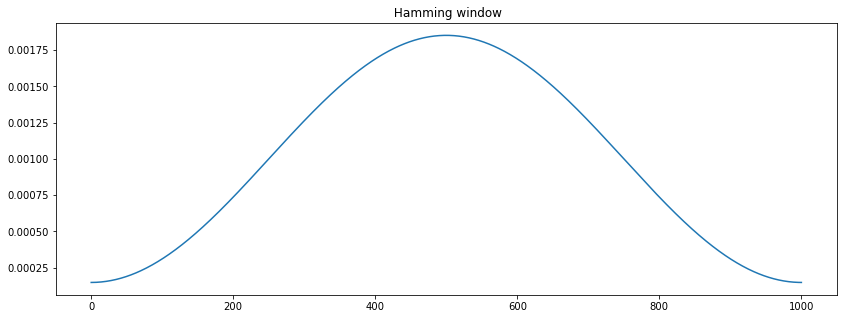

In [31]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
#
taps = 1001
cut_off = 14700
Nyq= sample / 2
norm_cut_off = cut_off / Nyq
lp = firwin(taps, norm_cut_off,pass_zero=True, window= "hamming", nyq = sample/ 2)

#filter the signal
R_filt = lfilter(lp, 1, data) #signal.lfilter to filter the carrier phase (signal)
time = np.linspace(0,sample,len(R_filt))
plt.figure(figsize=(14, 5))
plt.title(" Hamming window")
plt.plot(lp)


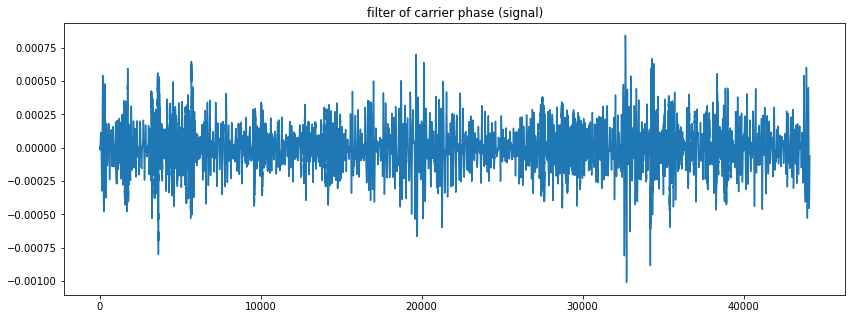

In [30]:
plt.figure(figsize=(14, 5))
plt.title("filter of carrier phase (signal)")
plt.plot(time,R_filt)

# Apply the numpy FFT to the window function and plot the spectrum

Text(0.5, 1.0, 'numpy FFT to the window function & spectrum')

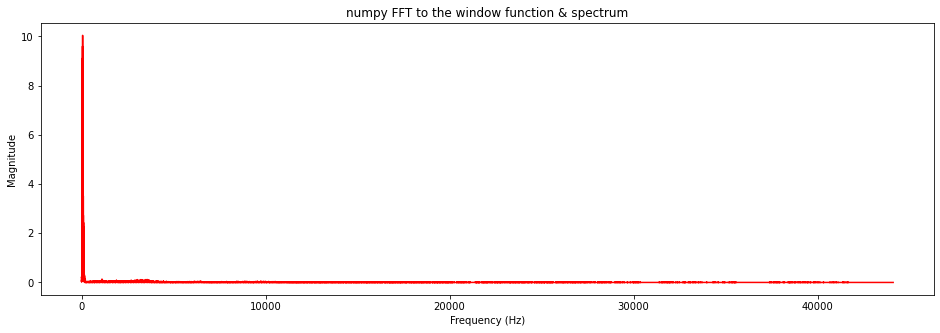

In [32]:
#Fourier transform for the filtered signal
X = np.fft.rfft(R_filt)# returns the fourier transform 
    
#spectrum from each Fourier transformed second
TP_mag = np.absolute(X) #returns the absolute value as x
FTP = np.linspace(0, sample, len(TP_mag)) 
    
plt.figure(figsize=(16, 5))
    
    
plt.plot(FTP, TP_mag, color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('numpy FFT to the window function & spectrum')

# Create a function containing an overlap-and-add implementation of this filter to filter an entire wav-file.

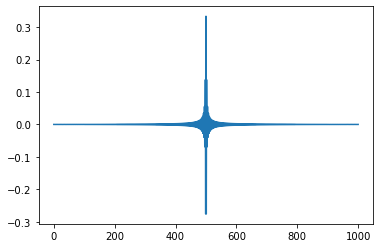

In [33]:
#https://github.com/jthiem/overlapadd/blob/master/Overlap-Add%20Filter%20development.ipynb

#the filtered signal
taps = 1001 # this changes the look of the gragh

testfilt = firwin(taps, [14700], nyq=sample/2, pass_zero=False)
plt.plot(testfilt)

# Carry out the overlap-add FFT processing:'
# overlap-add method is used to decompose the signal into simple components, process each of the components in some useful way, and recombine the processed components into the final signal.

# Reference
#https://github.com/jthiem/overlapadd/blob/master/Overlap-Add%20Filter%20development.ipynb
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
#https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units